In [57]:
import sys
sys.path.insert(1,'/Users/patrick/Projects/BMI-203/Project1')

# Imports
import align.algs
from align import algs
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [12]:
# Set data path

base_path = '/Users/patrick/Projects/BMI-203/Project1/'
scoring_path = base_path + 'scoring_matrices/'
sequence_path = base_path + 'sequences/'

Part 2: Question 1

In [13]:
# Functions

def paired_file_reader(file):
    pair = []
    amino = []
    with open(file) as file:
        for n, line in enumerate(file):
            pair = []
            for name in line.split():
                pair.append(name)
            amino.append(pair)
    return amino

In [28]:
# Generate lists of pair filenames

pos_pairs = paired_file_reader(scoring_path + 'Pospairs.txt')
neg_pairs = paired_file_reader(scoring_path + 'Negpairs.txt')

In [29]:
# This file has 'x' values in it for some reason, 
# so let's throw it out for now.
neg_pairs.remove(neg_pairs[32])

In [30]:
# Set alignment parameters

gap = 11, 3
sim_matrix = scoring_path + 'BLOSUM50.mat'

In [16]:
# Generate positive alignment scores

pos_scores = []
for seq_a, seq_b in pos_pairs:
    sw = algs.SmithWaterman(sim_matrix, gap)
    sw.align(base_path + seq_a, base_path + seq_b)
    pos_scores.append(sw.score_[0])

In [32]:
# Generate negative alignment scores

neg_scores = []
for seq_a, seq_b in neg_pairs:
    sw = algs.SmithWaterman(sim_matrix, gap)
    sw.align(base_path + seq_a, base_path + seq_b)
    neg_scores.append(sw.score_[0])

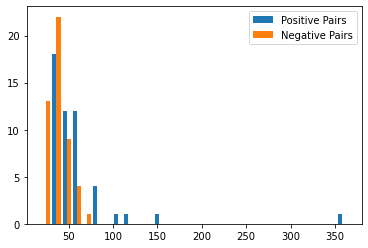

In [52]:
# Plot histogram of alignment scores

plt.hist([pos_scores, neg_scores], bins=30, 
         label=['Positive Pairs', 'Negative Pairs'])
plt.legend(loc='upper right')
plt.show()

Part 2: Question 2

In [74]:
# Calculate the threshold of the confustion matric

all_scores = pos_scores + neg_scores
cm_thresh = np.mean(all_scores)
print(f'Threshold Value = {cm_thresh:.2f}')

Threshold Value = 48.58


In [60]:
# Generate predicted classification

pred = []
for value in all_scores:
    if value >= cm_thresh:
        pred.append(1)
    else:
        pred.append(0)

In [62]:
# Generate predicted classification

actual = [1]*len(pos_scores) + [0]*len(neg_scores)

In [64]:
# Calculate confusion matrix

confusion_matrix(actual, pred)

array([[41,  8],
       [26, 24]])

Part 2: Question 3